In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import umap

C:\Users\yedidyab\Anaconda3\envs\piplnew\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_path = r'X:\yedidyab\dl_project\test_data\temp_files\props_df\*'
cell_by_OD_path = r'X:\yedidyab\dl_project\test_data\merged_cell_by_OD.raw.txt'
encoding_file_path = r'X:\dl4cv_project\data_for_einav\Outputs\encodings.csv'
# encoding_file_path = r'X:\dl4cv_project\rotate_single_cell\Outputs_32\encodings.csv'
dim = 32
filenames_path = r'X:\dl4cv_project\data_for_einav\Outputs\filenames.csv'
# filenames_path = r'X:\dl4cv_project\rotate_single_cell\Outputs_32\filenames.csv'


In [3]:
# concatenate df_prop files
dfs = []
for file in glob.iglob(df_path):
    name = '_'.join(file.split('\\')[-1].split('_')[:2])
    if 'single' in file:
        df = pd.read_csv(file)
        df['field_of_view'] = name
        dfs.append(df)
prop_df = pd.concat(dfs)
print(len(prop_df))

10296


In [4]:
#load cell_by_OD
od = pd.read_csv(cell_by_OD_path, sep = '\t')[['field_of_view','cell_id','sample_name']]
od.rename(columns={'cell_id':'label', 'sample_name':'OD'}, inplace=True)


In [5]:
# merge od_df with props_df
df = od.merge(prop_df, on = ['field_of_view','label'])

# clean no signal cells
df=df[pd.to_numeric(df['OD'], errors='coerce').notnull()]

#sort by OD
df['OD'] = pd.to_numeric(df.OD)
df.sort_values(by = 'OD', inplace=True)
df.label = df['label'].apply(str)
df['fov_label'] = df.field_of_view + '_' + df.label
df.drop(['field_of_view','label','label.1'], axis=1, inplace=True)

df

,OD,area,axis_major_length,axis_minor_length,centroid-0,centroid-1,extent,orientation,eccentricity,equivalent_diameter_area,...,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv,in_div,fov_label
4695,0.06,308,32.416624,12.165001,689.344156,1665.214286,0.550000,-0.533912,0.926915,19.802974,...,5852.5,3145.5,5634.4,2938.4,0.452671,0.278521,0.208293,0.405754,False,fov_12_1137
6162,0.06,304,29.541675,13.138919,1562.332237,959.680921,0.608000,-0.972035,0.895650,19.673963,...,7068.5,3664.5,6165.4,2890.8,0.358620,0.351764,0.336750,0.334906,False,fov_12_2672
1055,0.06,244,25.106664,12.396022,614.323770,1904.536885,0.847222,1.523737,0.869613,17.625846,...,4416.0,1940.0,4243.6,1710.0,0.241787,0.328593,0.576695,0.442629,False,fov_11_1097
262,0.06,253,26.745474,12.139431,186.426877,517.375494,0.620098,0.473451,0.891059,17.947969,...,6574.0,2900.0,6128.0,2777.8,0.468466,0.460893,0.237729,0.221126,False,fov_11_268
10253,0.06,331,32.513908,13.086719,1977.661631,97.326284,0.821340,-1.527009,0.915422,20.529060,...,5240.0,2712.0,5075.0,2533.0,0.496430,0.659807,0.162900,0.094257,False,fov_13_3449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,6.10,149,18.567379,10.229675,1369.664430,1424.040268,0.620833,0.837042,0.834539,13.773623,...,5941.0,4269.0,5584.4,3299.0,0.422453,0.304589,0.307578,0.472946,False,fov_13_2393
2398,6.10,169,19.099377,11.276010,1325.461538,1688.745562,0.722222,0.430449,0.807121,14.668929,...,5261.0,1916.0,5064.0,1845.2,0.848241,0.774969,0.048181,0.070504,False,fov_11_2483
5127,6.10,184,19.702545,11.888669,939.516304,1173.043478,0.807018,1.310145,0.797433,15.306080,...,4992.0,2968.0,4899.6,2844.6,0.938441,0.869377,0.020214,0.041834,False,fov_12_1592
2400,6.10,159,20.501158,9.876505,1324.327044,183.176101,0.697368,1.181668,0.876307,14.228320,...,6467.0,3198.0,6179.8,3037.6,0.648389,0.786739,0.084203,0.058093,False,fov_11_2485


In [6]:
def plot_boxplot(df, x, y):
    sns.boxplot(x=x, y=y, data=df)
    plt.show()

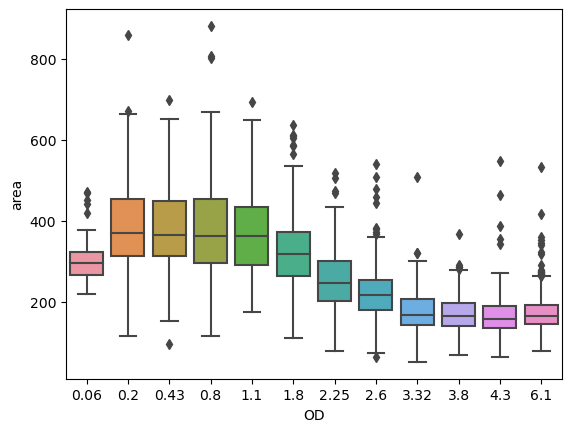

In [7]:
#plot area by OD
plot_boxplot(df, 'OD', 'area')

In [8]:
# Import the CSV file into a pandas DataFrame
filenames = pd.read_csv(filenames_path, names = ['path'])
filenames.path[0]

'/home/labs/danielda/dl4cv_project/data_for_einav/rotation/train/fov_11_hyb_1_label_1000_bb_994_567.npy'

In [9]:
# Import the CSV file into a pandas DataFrame
filenames = pd.read_csv(filenames_path, names = ['full_path'])

# Extract only the file name from the path
filenames.path = filenames.full_path.str.split('/').str[-1]

# Extract the field of view from the file name
filenames['field_of_view'] = filenames.path.str.split('_').str[:2]
filenames.field_of_view = 'fov_' + filenames.field_of_view.str[1]

# Extract the label from the file name
filenames['label'] = filenames.path.str.split('_').str[5]

filenames

C:\Users\yedidyab\AppData\Local\Temp\ipykernel_13508\923577933.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  filenames.path = filenames.full_path.str.split('/').str[-1]


,full_path,field_of_view,label
0,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11,1000
1,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11,1001
2,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11,1002
3,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11,1004
4,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11,1005
...,...,...,...
8258,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13,995
8259,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13,996
8260,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13,997
8261,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13,998


In [16]:
encoding = pd.read_csv(encoding_file_path, header=None)
encoding['field_of_view'] = filenames.field_of_view
encoding['label'] = filenames.label
encoding['path'] = filenames.path
encoding['full_path'] = filenames.full_path

encoding['fov_label'] = encoding.field_of_view + '_' + encoding.label

encoding.drop(['field_of_view','label'], axis=1, inplace=True)
encoding

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,path,full_path,fov_label
0,-0.146192,1.053192,0.025184,-0.367791,2.033356,1.653195,0.093366,-0.092680,-0.510840,-0.610143,...,2.476526,0.463616,-0.141126,-0.124895,0.155537,2.679441,-0.175642,fov_11_hyb_1_label_1000_bb_994_567.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11_1000
1,-1.385511,0.201989,0.390658,0.872560,-0.756726,-0.142559,0.231994,0.003485,-0.353290,0.091944,...,-0.522843,1.502514,-0.051422,-0.774821,-1.610592,3.019354,0.149363,fov_11_hyb_1_label_1001_bb_807_583.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11_1001
2,-0.420021,-0.007162,-1.564038,-0.286164,0.381942,0.084521,0.001852,0.046263,-0.036888,-1.031578,...,3.574549,0.468636,1.533238,0.078470,-0.009949,4.759296,0.718078,fov_11_hyb_1_label_1002_bb_1315_570.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11_1002
3,0.008294,-0.145167,0.045291,0.431550,-0.115204,-0.065451,-0.603615,1.860936,-0.293903,-0.174816,...,0.844291,0.451389,0.408869,0.260773,-1.808291,-0.033284,0.344365,fov_11_hyb_1_label_1004_bb_588_574.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11_1004
4,-0.348021,0.608547,-1.387238,0.530165,3.778418,0.506145,-0.103703,1.090680,0.654882,1.604043,...,-3.952649,1.168634,-0.084966,0.628525,1.196117,0.001523,-0.067088,fov_11_hyb_1_label_1005_bb_1154_589.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_11_1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,-0.060219,-0.605854,-0.680982,-2.223899,0.058728,-0.014098,3.413562,0.401053,-1.080063,0.484931,...,-0.703284,-0.027006,-0.324640,-0.299726,0.093290,-0.001649,-0.086741,fov_13_hyb_1_label_995_bb_1030_599.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13_995
8259,-0.131106,0.015145,-0.007312,1.096639,2.077315,0.195441,-0.919389,1.501209,0.543075,-0.220120,...,1.063689,0.018785,-1.532030,-0.040896,-1.225814,0.110160,0.299061,fov_13_hyb_1_label_996_bb_1326_601.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13_996
8260,2.188985,0.403763,0.017486,-0.714204,1.326453,0.832946,0.739182,0.890888,-0.033826,-0.780874,...,1.149078,0.066265,0.779690,0.067926,0.147709,-0.332175,0.835494,fov_13_hyb_1_label_997_bb_652_593.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13_997
8261,-0.421475,-0.057220,0.059636,0.846501,0.208156,0.157838,-0.056093,0.046542,-0.996252,-1.466977,...,1.137781,0.232766,0.105482,-0.070701,-3.117579,2.497251,-0.597297,fov_13_hyb_1_label_998_bb_506_594.npy,/home/labs/danielda/dl4cv_project/data_for_ein...,fov_13_998


In [17]:
assert len(encoding.fov_label) == len(df.fov_label)
assert len(encoding.fov_label.unique()) == len(encoding.fov_label)
assert len(df.fov_label.unique()) == len(df.fov_label)


AssertionError: 

In [21]:
merged_df = encoding.merge(df, on='fov_label')
correlation = merged_df.corr()
merged_df

,0,1,2,3,4,5,6,7,8,9,...,ribo_sum,dapi_med,ribo_med,dapi_20,ribo_20,dapi_fc,ribo_fc,dapi_cv,ribo_cv,in_div
0,-0.146192,1.053192,0.025184,-0.367791,2.033356,1.653195,0.093366,-0.092680,-0.510840,-0.610143,...,1663912,7764.5,3920.5,6375.2,2759.0,0.450385,0.399566,0.287887,0.337363,True
1,-1.385511,0.201989,0.390658,0.872560,-0.756726,-0.142559,0.231994,0.003485,-0.353290,0.091944,...,778386,6098.0,2982.0,5829.2,2782.2,0.871200,0.774555,0.044345,0.065255,False
2,-0.420021,-0.007162,-1.564038,-0.286164,0.381942,0.084521,0.001852,0.046263,-0.036888,-1.031578,...,952721,5393.5,2925.5,5141.2,2673.2,0.372551,0.446799,0.404055,0.294098,False
3,0.008294,-0.145167,0.045291,0.431550,-0.115204,-0.065451,-0.603615,1.860936,-0.293903,-0.174816,...,466604,5193.0,2510.0,5106.0,2454.8,0.921328,0.832700,0.022742,0.034112,False
4,-0.348021,0.608547,-1.387238,0.530165,3.778418,0.506145,-0.103703,1.090680,0.654882,1.604043,...,865190,5199.5,2485.5,5071.0,2427.0,0.825224,0.851280,0.040370,0.035390,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,-0.060219,-0.605854,-0.680982,-2.223899,0.058728,-0.014098,3.413562,0.401053,-1.080063,0.484931,...,700983,5948.0,3104.0,5710.8,3013.4,0.422334,0.449225,0.240715,0.269276,False
7227,-0.131106,0.015145,-0.007312,1.096639,2.077315,0.195441,-0.919389,1.501209,0.543075,-0.220120,...,1400633,4891.0,3046.0,4654.2,2253.0,0.395463,0.287923,0.351915,0.480475,False
7228,2.188985,0.403763,0.017486,-0.714204,1.326453,0.832946,0.739182,0.890888,-0.033826,-0.780874,...,509404,6932.0,4812.5,5432.4,2803.6,0.399206,0.316612,0.349410,0.412024,False
7229,-0.421475,-0.057220,0.059636,0.846501,0.208156,0.157838,-0.056093,0.046542,-0.996252,-1.466977,...,1319964,11863.0,9101.0,7629.8,5030.2,0.521517,0.408561,0.251860,0.324941,False


In [22]:
os.getcwd()

'C:\\Users\\yedidyab\\Box\\Yedidya_Ben_Eliyahu\\dl_proj\\dl_project\\notebooks'

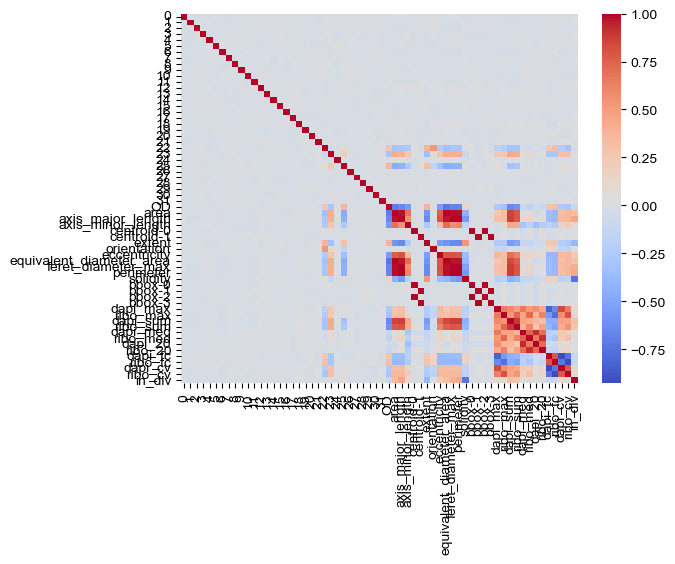

In [23]:
sns.heatmap(correlation, annot=False, cmap='coolwarm', xticklabels=True, yticklabels=True)
sns.set(font_scale = .5)

plt.savefig('heatmap.png', dpi=900)

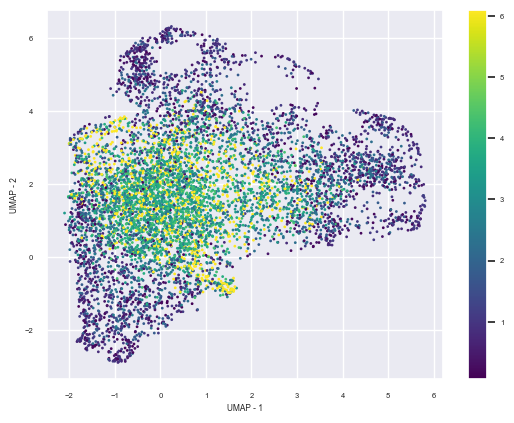

In [24]:
# Split the latent space columns from the "OD" column
latent_space = merged_df.iloc[:, :dim].values
categories = merged_df['OD'].values

# Perform UMAP dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_space)

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
plt.colorbar()
plt.savefig('UMAP_by_OD.png', dpi=900)

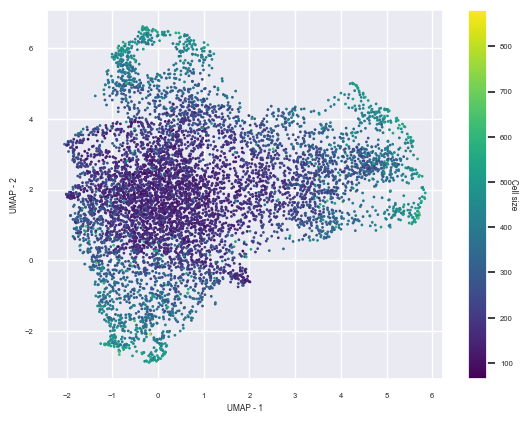

In [53]:
categories = merged_df['area'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('Cell size', rotation=270)

plt.savefig('UMAP_by_area.png', dpi=900)

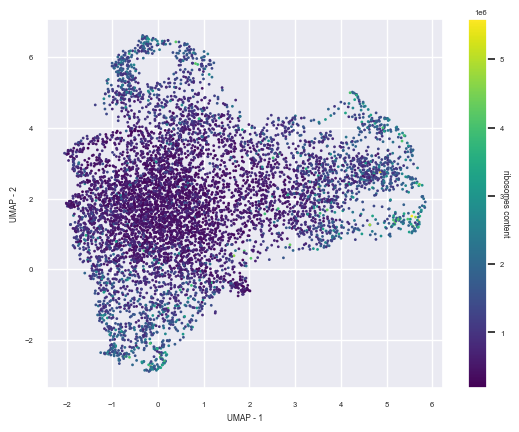

In [54]:
categories = merged_df['ribo_sum'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('ribosomes content', rotation=270)
plt.savefig('UMAP_by_ribo_sum.png', dpi=900)

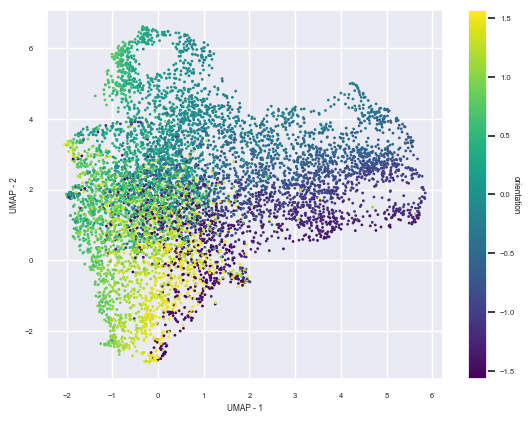

In [55]:
categories = merged_df['orientation'].values

# Plot the reduced data, coloring each point based on its "OD" category
plt.scatter(embedding[:, 0], embedding[:, 1], c=categories, cmap='viridis', s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('orientation', rotation=270)
plt.savefig('UMAP_by_orientation.png', dpi=900)

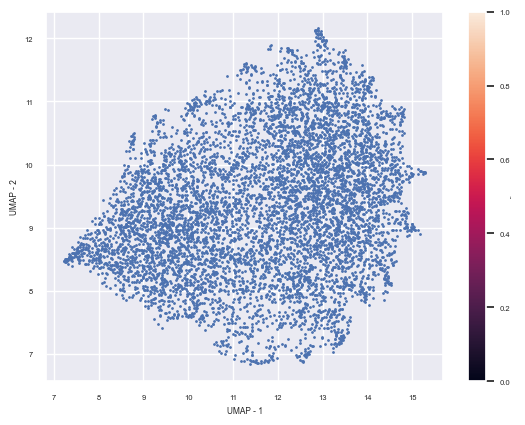

In [68]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
# plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('..', rotation=270)
plt.savefig('UMAP_clean.png', dpi=900)

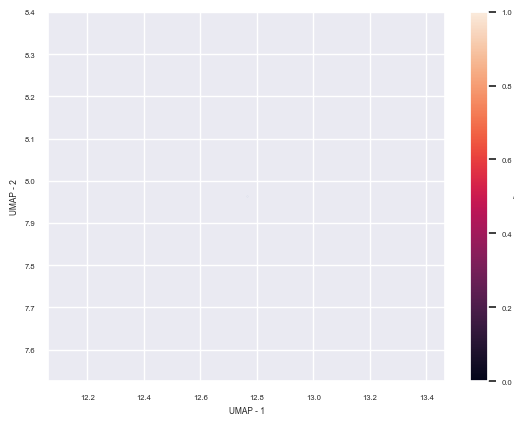

In [69]:
plt.scatter(embedding[:, 0][1], embedding[:, 1][1], s=.001)
plt.xlabel('UMAP - 1')
plt.ylabel('UMAP - 2')
cbar = plt.colorbar()
cbar.set_label('..', rotation=270)
plt.savefig('UMAP_empty.png', dpi=900)

In [43]:
proj = pd.DataFrame(embedding, columns = ['x', 'y'])
merged_df['umap_0'] = proj['x']
merged_df['umap_1'] = proj['y']

import re
# Define regex pattern and replacement string
pattern = r"/home/labs/danielda/dl4cv_project"
replacement = r'X:/dl4cv_project'

# Apply regex substitution to 'path' column
merged_df['full_path'] = merged_df['full_path'].apply(lambda x: re.sub(pattern, replacement, x))
merged_df.full_path

merged_df.to_csv('merged_df.csv')

0       X:\dl4cv_project/data_for_einav/rotation/train...
1       X:\dl4cv_project/data_for_einav/rotation/train...
2       X:\dl4cv_project/data_for_einav/rotation/train...
3       X:\dl4cv_project/data_for_einav/rotation/train...
4       X:\dl4cv_project/data_for_einav/rotation/train...
                              ...                        
7226    X:\dl4cv_project/data_for_einav/rotation/train...
7227    X:\dl4cv_project/data_for_einav/rotation/train...
7228    X:\dl4cv_project/data_for_einav/rotation/train...
7229    X:\dl4cv_project/data_for_einav/rotation/train...
7230    X:\dl4cv_project/data_for_einav/rotation/train...
Name: full_path, Length: 7231, dtype: object

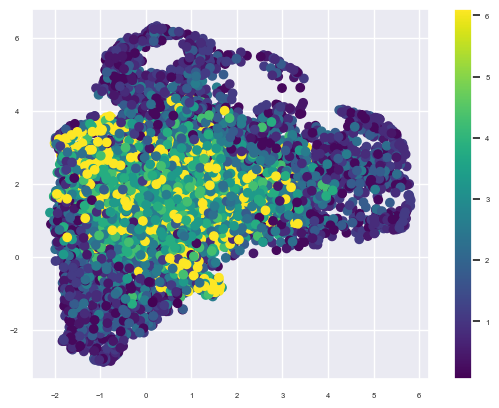

In [29]:
import matplotlib.pyplot as plt
import mplcursors

# create a sample dataframe
import pandas as pd

# create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(df['umap_0'], df['umap_1'], c=df['OD'], cmap='viridis')
plt.colorbar(sc)

# add interactivity
def on_select(sel):
    index = sel.target.index
    path = df.loc[index, 'full_path']
    # open the image at the selected path, e.g. using Pillow
    img = np.load(path)
    print(img.shape)
    plt.imshow(img)
    plt.show()

mplcursors.cursor(sc).connect("add", on_select)

plt.show()


C:\Users\yedidyab\Anaconda3\envs\piplnew\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


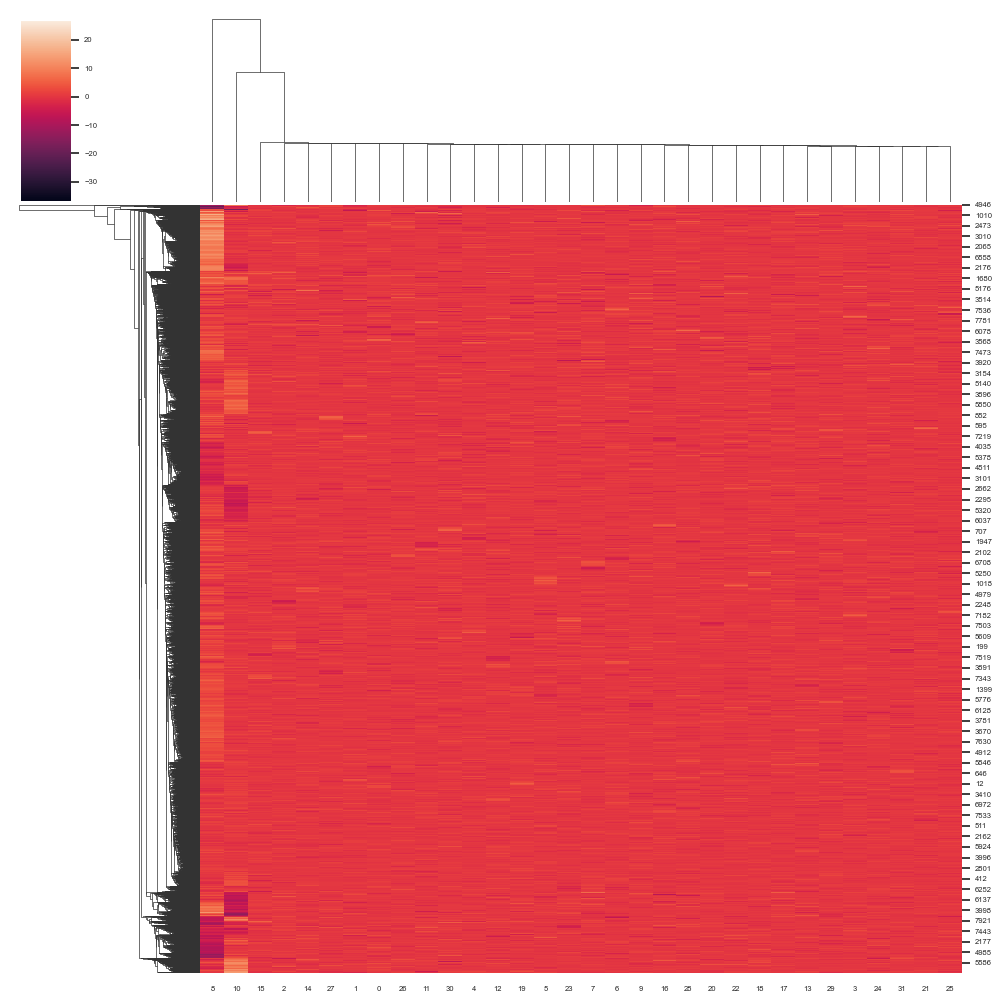

In [71]:

# drop the "fov_label" column from the dataframe
encoding = encoding.drop('fov_label', axis=1)

# create a clustermap using the remaining columns
sns.clustermap(encoding)